In [1]:
import numpy as np
from math import log,e
import matplotlib.pyplot as plt

In [2]:
def insert_ones(array2d:np.array):
    """
    So, we don't want to write extra boiler plate code or formula for calculating the 
    bias separately. That's why we will make it part of the weights w itself.
    Since we are doing that, np.dot(x,w) will also need another term in x to account
    for the extra bias term. so we will just put a one at the starting of each x vector
    (2,3,5) --> (1,2,3,5)

    this function just puts a column of 1 into the left side of the X array
    """
    return np.insert(array2d,0,values=1,axis=1)

In [3]:
def gradient_descent(w:np.array,lr:float,X:np.array,Y:np.array,max_steps:int,cost_func,grad_decr,predictY):
    """
    w : coeffs. inputs w are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    Ɛ ~= 0 (some small value close to 0). We want to stop our loop when the cost function 
                                          becomes ~= Ɛ

    returns : updated weights w
    """
    costs = []
    Ɛ = 10**-3
    cost = None
    for step in range(max_steps):
        w_prev = w.copy()
        
        Y_pred = predictY(w,X)
        decr_w = grad_decr(w,X,Y_pred,Y)

        w= w_prev - lr*decr_w

        cost = cost_func(w,X,Y_pred,Y)
        costs.append(cost)
        # print(cost)
        # print(w)
        if (cost)**2 < Ɛ:
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return w

In [4]:
def sigmoid(t: float):
    return 1 / (1 + np.exp(-t))

def prob(w: np.array, x: np.array, y: float):
    return sigmoid(y * np.dot(w, x))


def logloss(w:np.array,X:np.array,Y_pred:np.array,Y=None):
    n = len(Y)
    # print(sum([int(Y_pred[i]<0) + int(1-Y_pred[i]<0) for i in range(n)]))
    # print(sum([int(1-Y_pred[i]==0) for i in range(n)]))
    # print(sum([int(Y_pred[i]==0) for i in range(n)]))

    return -(1/n)*sum([Y[i]*log(Y_pred[i]) + (1-Y[i])*log(1-Y_pred[i]) for i in range(n)])

def grad_decr_logloss(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    n = len(Y)
    return (1/n) * np.dot(X.T,Y_pred-Y)




# functions defined in edx implementation don't work : 
def _logistic_cost_func(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    return -sum([log(prob(w, X[i], Y_pred[i])) for i in range(len(Y_pred))])

def _logistic_grad_decr(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    return -np.sum(np.array([Y_pred[i] * X[i] * prob(w, X[i], -Y_pred[i]) for i in range(len(Y_pred))]))

In [5]:
class BinaryLogisticRegression():

    def fit(self,X,Y,init_w=None,lr=0.05,max_steps=500,cost_func=logloss,grad_decr=grad_decr_logloss):
        if init_w == None:
            init_w = np.zeros(len(X[0]))
        self.cost_func = cost_func
        self.w = gradient_descent(w=init_w,lr=lr,X=X,Y=Y,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr,predictY=self.predictYcontinuous)

    def predict(self,x:np.array):
        # input: 1 x vector
        return sigmoid(np.dot(self.w,x))
    
    def predictYcontinuous(self,w:np.array,X:np.array):
        #
        # same thing as predict() but for an array of x vectors, instead of a one x vector
        return [sigmoid(np.dot(w,X[i])) for i in range(len(X))]

    def predictYdiscrete(self,w:np.array,X:np.array):
        #
        # same thing as predict() but for an array of x vectors, instead of a one x vector
        return [1 if sigmoid(np.dot(w,X[i])) >0.5 else 0 for i in range(len(X))]

    def score(self,X,Y):
        Y_pred = np.array(self.predictYdiscrete(self.w,X))
        return 1 - sum((Y-Y_pred)**2)/len(Y_pred) # self.cost_func(self.w, X, predict,Y)

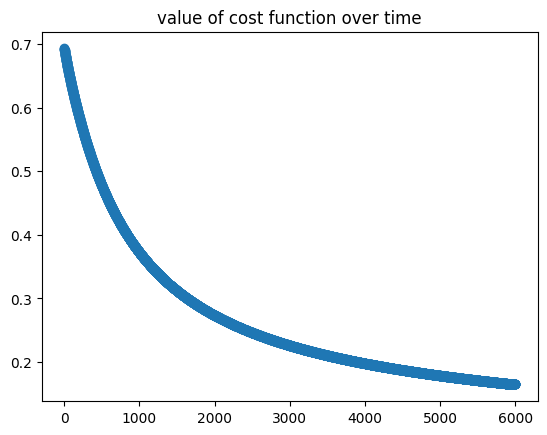

In [6]:
clf = BinaryLogisticRegression()
X = np.array(
    [np.array([1,x_i]) for x_i in [0.05, +0.1, +0.2, +0.3, +0.4, +0.5, +0.6, +0.7, +0.8, +0.9]]
)
Y = np.array([0,0,0,0,0, +1, +1, +1, +1, +1])
clf.fit(X, Y,cost_func=logloss,grad_decr=grad_decr_logloss, lr=0.05,max_steps=6000)

In [7]:
print(clf.w)

[-4.32113638  9.72660974]


In [8]:
print("\n".join(map(str, zip(clf.predictYcontinuous(clf.w, X), Y))))

(0.02114860508852148, 0)
(0.033945124590326524, 0)
(0.08503565738116012, 0)
(0.19731618275444568, 0)
(0.3940087380137817, 0)
(0.6323167202966331, 1)
(0.8197758311179245, 1)
(0.923260187122923, 1)
(0.9695324397446692, 1)
(0.9882584728487632, 1)


In [9]:
clf.predict([1,8])

1.0

In [10]:
clf.predict([1,0.0])

0.013110606961031316

In [11]:
1 if clf.predict([1,+8]) > 0.5 else 0

1

In [12]:
clf.score(X=X,Y=Y)

1.0

In [13]:
display(X)

array([[1.  , 0.05],
       [1.  , 0.1 ],
       [1.  , 0.2 ],
       [1.  , 0.3 ],
       [1.  , 0.4 ],
       [1.  , 0.5 ],
       [1.  , 0.6 ],
       [1.  , 0.7 ],
       [1.  , 0.8 ],
       [1.  , 0.9 ]])

In [14]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target
# display(X)
# display(y)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
# display(X_train)
print(X_train.shape)
X_train = insert_ones(X_train)
X_test = insert_ones(X_test)
# display(X_train)
print(X_train.shape)

(426, 30)
(426, 31)


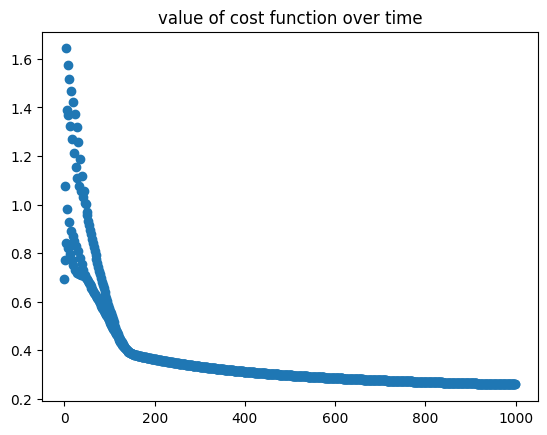

In [15]:
clf = BinaryLogisticRegression()
clf.fit(X_train,Y_train,lr=0.00001,max_steps=1000)

In [16]:
Y_test

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [17]:
Y_pred = clf.predictYdiscrete(clf.w,X_test)
np.array(Y_pred)

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [18]:
clf.score(X=X_test,Y=Y_test)

0.9370629370629371